In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

#### Gender
Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other
<br>
#### Age
Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset
<br>
#### Hypertension
Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension
<br>
#### Heart Disease
Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease
<br>
#### Smoking History
Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever
<br>
#### BMI
BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese
<br>
#### HbA1c level
HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes
<br>
#### Blood Glucose Level
Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes
<br>
#### Diabetes
Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.........

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

No Null values

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [73]:
df = df.drop_duplicates()
df.shape

(96146, 9)

### Diabetes

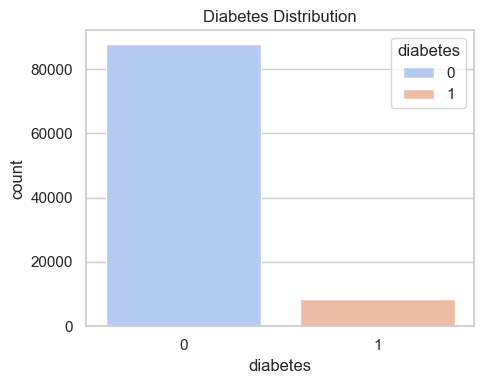

In [74]:
# Diabetes Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='diabetes', data=df, hue='diabetes', palette="coolwarm")
plt.title('Diabetes Distribution')
plt.tight_layout()
plt.show()

The vast majority of individuals in the dataset do not have diabetes. This indicates a class imbalance that will need to be addressed in predictive modeling to ensure the model does not become biased towards predicting the absence of diabetes.

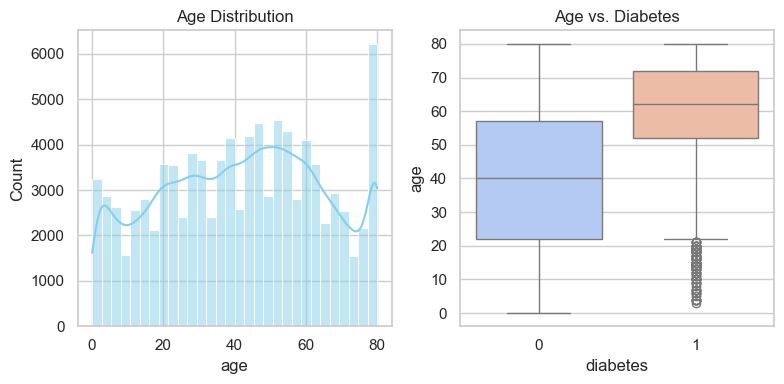

In [75]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.histplot(df['age'], bins=30, kde=True, color="skyblue")
plt.title('Age Distribution')
plt.subplot(122)
sns.boxplot(x='diabetes', y='age', data=df, palette='coolwarm')
plt.title('Age vs. Diabetes')
plt.tight_layout()
plt.show()

1) The age distribution is somewhat uniform
2) Older individuals tend to have a higher prevalence of diabetes, as shown by the age distribution among those with diabetes. This aligns with medical knowledge that the risk of diabetes increases with age.

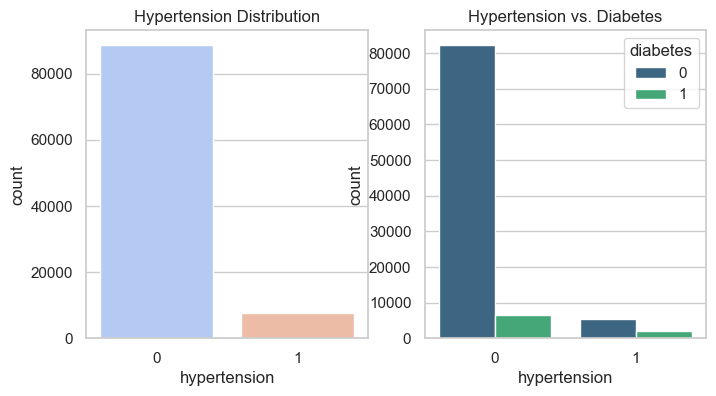

In [76]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.countplot(x='hypertension', data=df, palette="coolwarm")
plt.title('Hypertension Distribution')
plt.subplot(122)
sns.countplot(x='hypertension', hue='diabetes', data=df, palette='viridis')
plt.title('Hypertension vs. Diabetes')
plt.show()

1) A vast majority of individuals in the dataset do not have hypertension.
2) There's a noticeable difference in diabetes prevalence between individuals with and without hypertension. Those with hypertension have a higher incidence of diabetes, indicating a strong relationship between these two conditions.

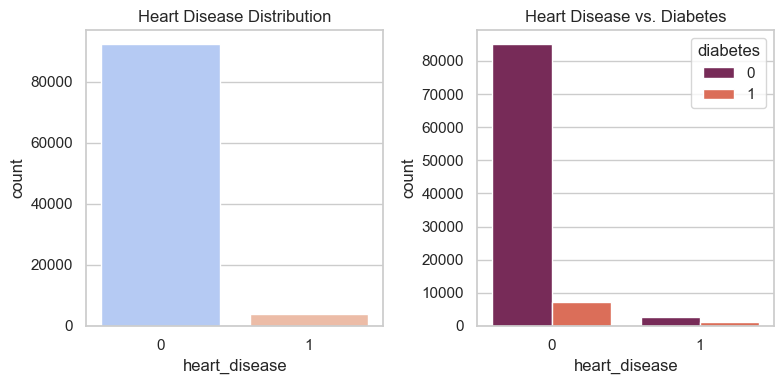

In [77]:
# Heart Disease Distribution
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.countplot(x='heart_disease', data=df, palette="coolwarm")
plt.title('Heart Disease Distribution')
plt.subplot(122)
sns.countplot(x='heart_disease', hue='diabetes', data=df, palette='rocket')
plt.title('Heart Disease vs. Diabetes')
plt.tight_layout()
plt.show()

1) Similar to hypertension, a significant portion of the dataset comprises individuals without heart disease. This highlights a relatively low prevalence of heart disease among the participants.
2) Similar to hypertension, individuals with heart disease have a higher prevalence of diabetes compared to those without heart disease. This suggests a potential link between heart disease and an increased risk of developing diabetes.

In [88]:
df['bmi'].describe()

count    96146.000000
mean        27.321461
std          6.767716
min         10.010000
25%         23.400000
50%         27.320000
75%         29.860000
max         95.690000
Name: bmi, dtype: float64

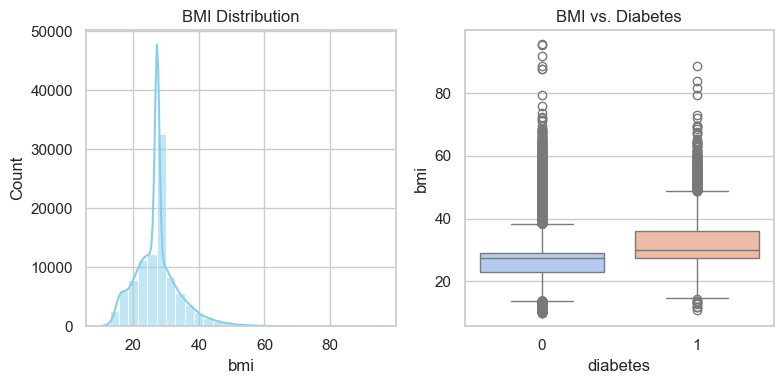

In [78]:
# BMI Distribution
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.histplot(df['bmi'], bins=30, kde=True, color="skyblue")
plt.title('BMI Distribution')
plt.subplot(122)
sns.boxplot(x='diabetes', y='bmi', data=df, palette='coolwarm')
plt.title('BMI vs. Diabetes')
plt.tight_layout()
plt.show()

1) The BMI distribution is roughly normal but slightly right-skewed, suggesting the presence of outliers with very high BMI values. The peak of the distribution is within the "overweight" range, indicating that overweight is common in this population.
2) Individuals with diabetes tend to have higher BMI values compared to those without diabetes. This supports the well-established link between obesity (or high BMI) and the risk of developing diabetes.

<Axes: xlabel='bmi', ylabel='Count'>

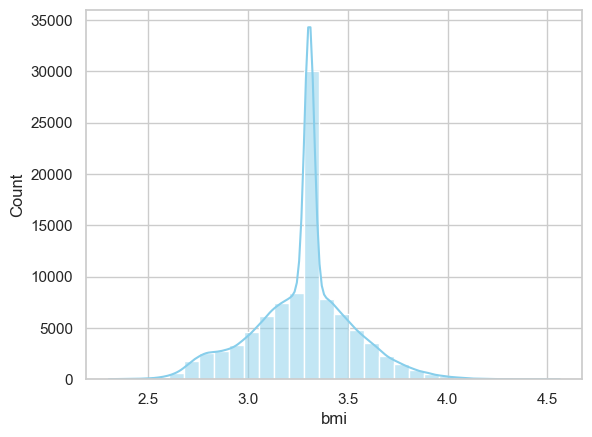

In [90]:
sns.histplot(np.log(df['bmi']), bins=30, kde=True, color="skyblue")

In [79]:
df['HbA1c_level'].describe()

count    96146.000000
mean         5.532609
std          1.073232
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: HbA1c_level, dtype: float64

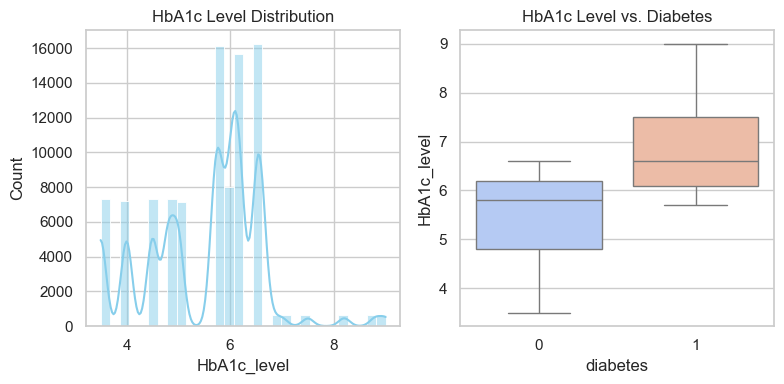

In [80]:
# HbA1c Level Distribution
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.histplot(df['HbA1c_level'], bins=30, kde=True, color="skyblue")
plt.title('HbA1c Level Distribution')
plt.subplot(122)
sns.boxplot(x='diabetes', y='HbA1c_level', data=df, palette='coolwarm')
plt.title('HbA1c Level vs. Diabetes')
plt.tight_layout()
plt.show()

1) The distribution of HbA1c levels is left-skewed, with a peak just below the diabetes threshold of 6.5%. This indicates that while a portion of the population has HbA1c levels indicative of diabetes, the majority have levels in the non-diabetic range.
2) As expected, individuals with diabetes have significantly higher HbA1c levels. HbA1c levels are a direct measure of blood sugar control over time, and higher levels are indicative of diabetes.

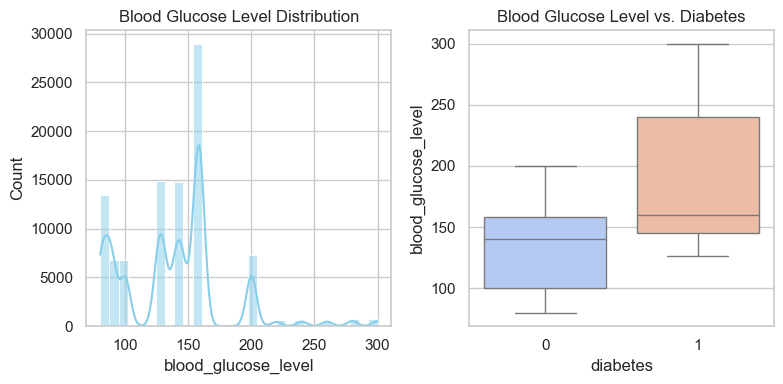

In [81]:
# Blood Glucose Level Distribution
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.histplot(df['blood_glucose_level'], bins=30, kde=True, color="skyblue")
plt.title('Blood Glucose Level Distribution')
plt.subplot(122)
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, palette='coolwarm')
plt.title('Blood Glucose Level vs. Diabetes')
plt.tight_layout()
plt.show()

We may try to group the glucose level into categories but it will be tough since there is an overlap of people with diabetes with low and high glucose levels.

Blood glucose levels are higher in individuals with diabetes compared to those without. This is consistent with the definition of diabetes, which involves elevated blood glucose levels.

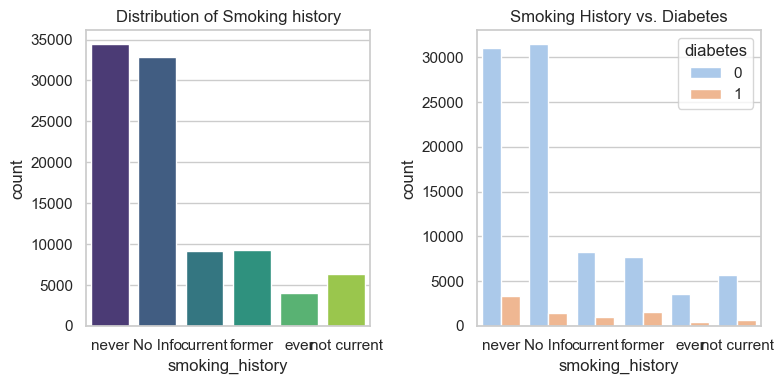

In [82]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.countplot(x='smoking_history', data=df, palette="viridis")
plt.title('Distribution of Smoking history')
plt.subplot(122)
sns.countplot(x='smoking_history', hue='diabetes', data=df, palette='pastel')
plt.title('Smoking History vs. Diabetes')
plt.tight_layout()
plt.show()

1) The smoking history categories include 'never', 'No Info', 'current', 'former', and 'ever'. The distribution suggests a significant variation in smoking habits, with 'never' and 'No Info' being particularly prominent. This variation can provide insights into the correlation between smoking habits and diabetes.
2) The distribution of diabetes prevalence across smoking history categories shows some variation. This could suggest that smoking history, directly or indirectly, might influence diabetes risk, although the impact is less clear than for some other variables.

In [83]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

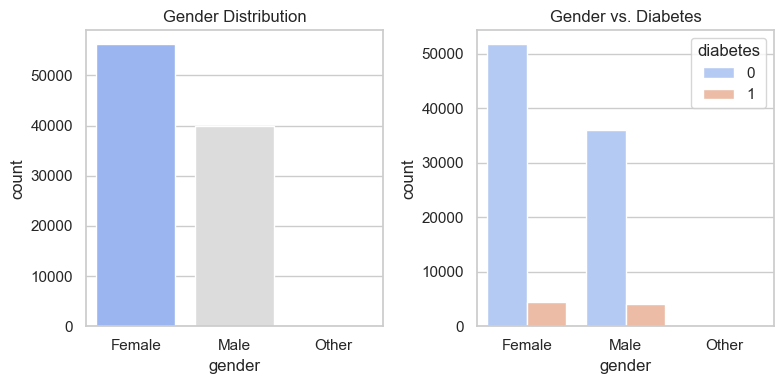

In [84]:
# Gender Distribution
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.countplot(x='gender', data=df, palette="coolwarm")
plt.title('Gender Distribution')
plt.subplot(122)
sns.countplot(x='gender', hue='diabetes', data=df, palette='coolwarm')
plt.title('Gender vs. Diabetes')
plt.tight_layout()
plt.show()

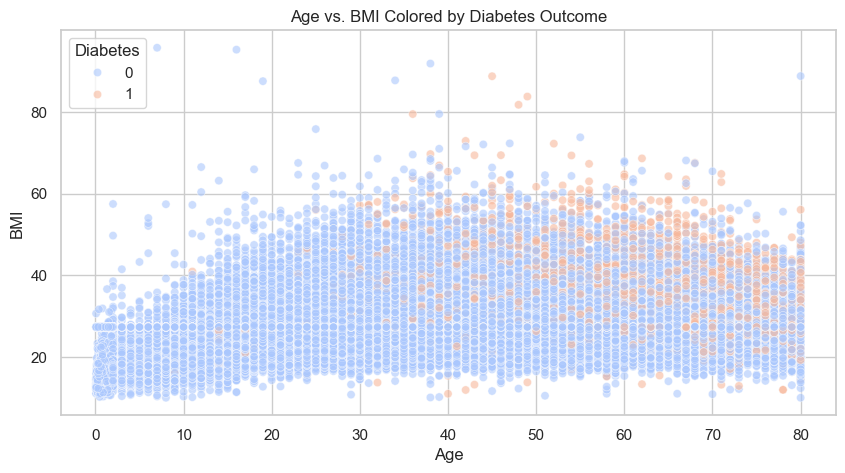

In [85]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df, palette='coolwarm', alpha=0.6)
plt.title('Age vs. BMI Colored by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Diabetes')
plt.show()

In [86]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

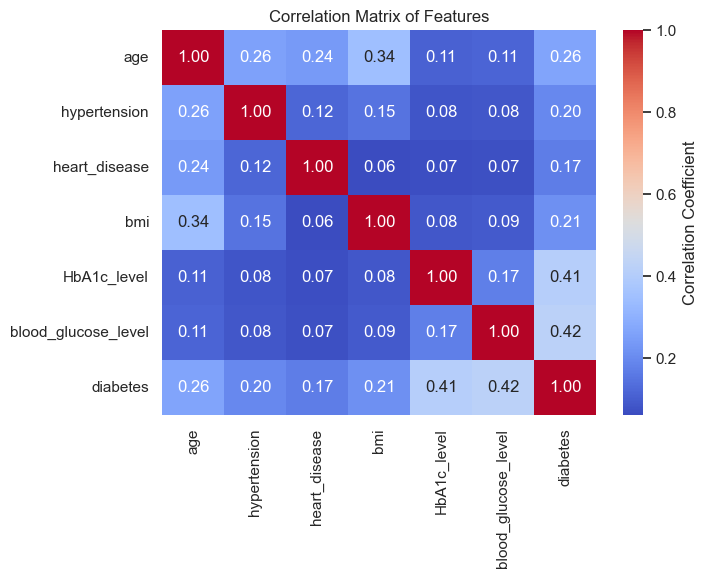

In [87]:
# Correlation matrix
corr_matrix = df[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes' ]].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Features')
plt.show()

Blood Glucose Level and Diabetes: There's a moderate positive correlation (0.44), indicating that higher blood glucose levels are associated with a higher probability of diabetes, which aligns with medical knowledge.

HbA1c Level and Diabetes: A similar moderate positive correlation (0.42) is observed here, supporting the fact that higher HbA1c levels, indicative of poor blood sugar control over time, are associated with diabetes.

Age and Diabetes: A slight positive correlation (0.18) suggests that older individuals have a somewhat higher risk of diabetes, though age alone is not a strong predictor.

Other features like BMI, Hypertension, and Heart Disease show lower correlations with diabetes, indicating that while they are factors, their direct linear relationship with diabetes in this dataset is less pronounced.

Inter-feature Correlations: Most features show low to moderate correlations with each other, indicating no extreme multicollinearity that might adversely affect modeling.

<Axes: xlabel='bmi', ylabel='Count'>

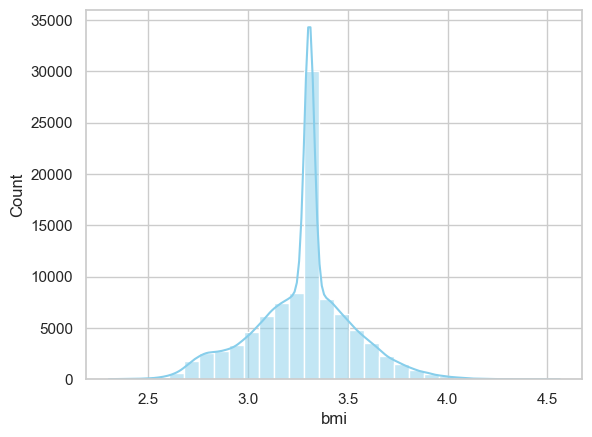

In [89]:
log transformation on bmi, 

### Data Preprocessing

In [102]:
# Applying logarithmic transformation on BMI
df1 = df.copy()
df1['bmi_log'] = np.log(df1['bmi'])

# Removing records with "other" category in gender
df1 = df1[df1['gender'] != 'Other']

# Grouping smoking status into three new categories
def group_smoking_status(status):
    if status in ['never', 'No Info']:
        return 'Never'
    elif status == 'current':
        return 'Smoker'
    elif status in ['ever', 'former', 'not current']:
        return 'Smoked previously'

df1['smoking_status_grouped'] = df1['smoking_history'].apply(group_smoking_status)

# Display the modifications to check the transformations and the new smoking status categories
df1[['gender', 'bmi', 'bmi_log', 'smoking_history', 'smoking_status_grouped']].head()


,gender,bmi,bmi_log,smoking_history,smoking_status_grouped
0,Female,25.19,3.226447,never,Never
1,Female,27.32,3.307619,No Info,Never
2,Male,27.32,3.307619,never,Never
3,Female,23.45,3.154870,current,Smoker
4,Male,20.14,3.002708,current,Smoker


In [103]:
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_log,smoking_status_grouped
0,Female,80.0,0,1,never,25.19,6.6,140,0,3.226447,Never
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,3.307619,Never
2,Male,28.0,0,0,never,27.32,5.7,158,0,3.307619,Never
3,Female,36.0,0,0,current,23.45,5.0,155,0,3.154870,Smoker
4,Male,76.0,1,1,current,20.14,4.8,155,0,3.002708,Smoker


In [111]:
df1.drop(['bmi', 'smoking_history'], axis=1, inplace=True)

In [117]:
df1 = pd.get_dummies(df1, columns=['gender', 'smoking_status_grouped'], drop_first=True)
df1.head()

,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,diabetes,bmi_log,gender_Male,smoking_status_grouped_Smoked previously,smoking_status_grouped_Smoker
0,80.0,0,1,6.6,140,0,3.226447,False,False,False
1,54.0,0,0,6.6,80,0,3.307619,False,False,False
2,28.0,0,0,5.7,158,0,3.307619,True,False,False
3,36.0,0,0,5.0,155,0,3.154870,False,False,True
4,76.0,1,1,4.8,155,0,3.002708,True,False,True


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [119]:
df1.head()

,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,diabetes,bmi_log,gender_Male,smoking_status_grouped_Smoked previously,smoking_status_grouped_Smoker
0,80.0,0,1,6.6,140,0,3.226447,False,False,False
1,54.0,0,0,6.6,80,0,3.307619,False,False,False
2,28.0,0,0,5.7,158,0,3.307619,True,False,False
3,36.0,0,0,5.0,155,0,3.154870,False,False,True
4,76.0,1,1,4.8,155,0,3.002708,True,False,True


In [120]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate your features and target variable
X = df1.drop('diabetes', axis=1)  # Features
y = df1['diabetes']  # Target variable

# It's important to apply SMOTE only on the training data to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Initialize SMOTE
sm = SMOTE(random_state=10)

# Apply SMOTE on the training data
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [122]:
X_train.shape, y_train.shape, X_train_smote.shape, y_train_smote.shape

((76902, 9), (76902,), (140238, 9), (140238,))

In [162]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_smote), columns=X_train_smote.columns)

# Transform the test data with the same scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [127]:
# X_train_smote.to_csv('X_train_smote.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# y_train_smote.to_csv('y_train_smote.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

### Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import learning_curve

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train_scaled, y_train_smote)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluation metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

print(f"Logistic Regression\nAccuracy: {accuracy_logistic}\nPrecision: {precision_logistic}\nRecall: {recall_logistic}\nF1 Score: {f1_logistic}")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression
Accuracy: 0.8815666285238739
Precision: 0.4177575412635174
Recall: 0.8640376692171866
F1 Score: 0.563207366199885
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     17527
           1       0.42      0.86      0.56      1699

    accuracy                           0.88     19226
   macro avg       0.70      0.87      0.75     19226
weighted avg       0.94      0.88      0.90     19226



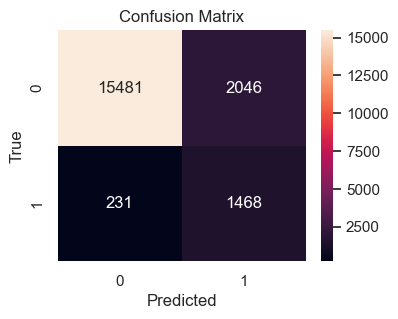

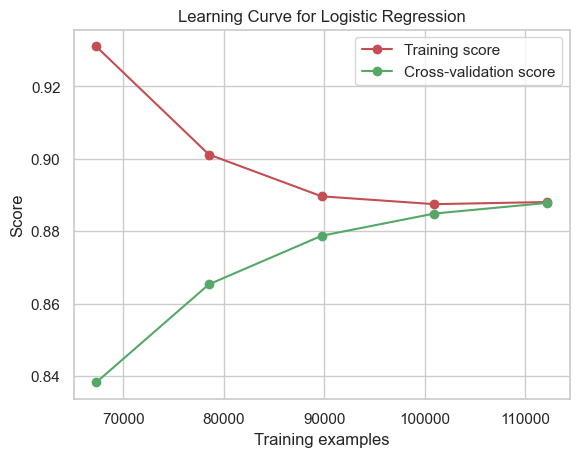

In [146]:
# Confusion Matrix
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_logistic, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(logistic_model, X_train_scaled, y_train_smote, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 10), verbose=0)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for Logistic Regression")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     17527
           1       0.46      0.84      0.59      1699

    accuracy                           0.90     19226
   macro avg       0.72      0.87      0.77     19226
weighted avg       0.94      0.90      0.91     19226



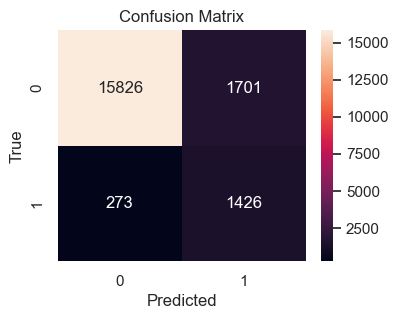

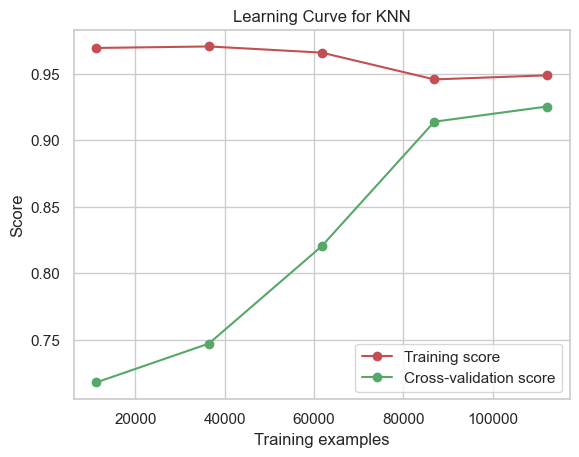

In [152]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_scaled, y_train_smote)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation Metrics
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Learning Curve
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(knn_model, X_train_scaled, y_train_smote, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
train_scores_mean_knn = np.mean(train_scores_knn, axis=1)
test_scores_mean_knn = np.mean(test_scores_knn, axis=1)

plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for KNN")
plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_knn, test_scores_mean_knn, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


### Decision Tree

Decision Tree
Accuracy: 0.9406532820139395
Precision: 0.6403420523138833
Recall: 0.7492642731018246
F1 Score: 0.6905343097369135


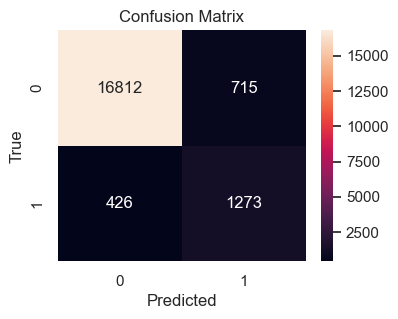

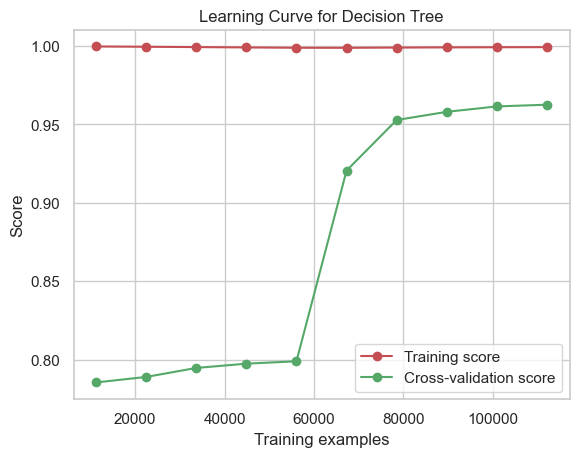

In [143]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train_scaled, y_train_smote)

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test_scaled)

# Evaluation Metrics
print(f"Decision Tree\nAccuracy: {accuracy_score(y_test, y_pred_dt)}\nPrecision: {precision_score(y_test, y_pred_dt)}\nRecall: {recall_score(y_test, y_pred_dt)}\nF1 Score: {f1_score(y_test, y_pred_dt)}")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Learning Curve
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(decision_tree_model, X_train_scaled, y_train_smote, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 10), verbose=0)
train_scores_mean_dt = np.mean(train_scores_dt, axis=1)
test_scores_mean_dt = np.mean(test_scores_dt, axis=1)

plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for Decision Tree")
plt.plot(train_sizes_dt, train_scores_mean_dt, 'o-', color="r", label="Training score")
plt.plot(train_sizes_dt, test_scores_mean_dt, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17527
           1       0.70      0.75      0.72      1699

    accuracy                           0.95     19226
   macro avg       0.84      0.86      0.85     19226
weighted avg       0.95      0.95      0.95     19226



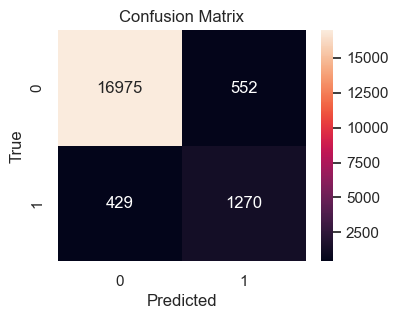

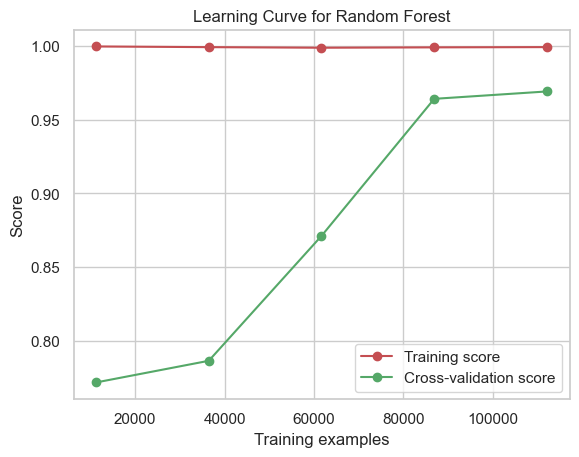

In [150]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest_model = RandomForestClassifier()

# Train the model
random_forest_model.fit(X_train_scaled, y_train_smote)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluation Metrics
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Learning Curve
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(random_forest_model, X_train_scaled, y_train_smote, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)

plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for Random Forest")
plt.plot(train_sizes_rf, train_scores_mean_rf, 'o-', color="r", label="Training score")
plt.plot(train_sizes_rf, test_scores_mean_rf, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17527
           1       0.70      0.75      0.72      1699

    accuracy                           0.95     19226
   macro avg       0.84      0.86      0.85     19226
weighted avg       0.95      0.95      0.95     19226



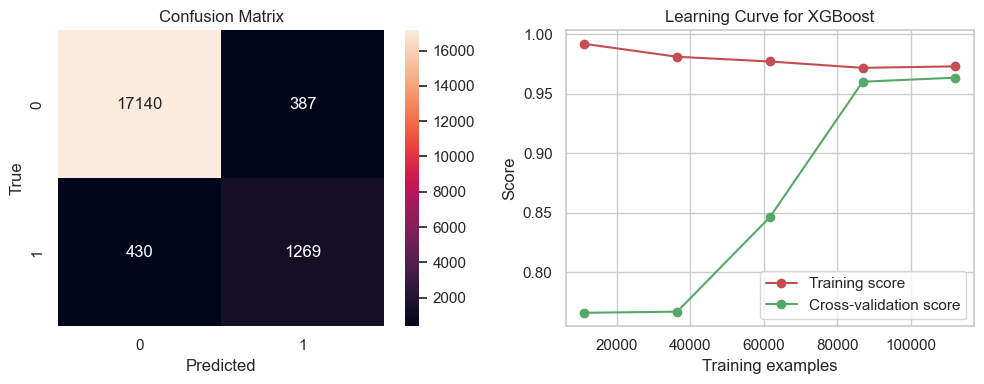

In [166]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_scaled, y_train_smote)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation Metrics
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.heatmap(cm_xgb, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Learning Curve
train_sizes_xgb, train_scores_xgb, test_scores_xgb = learning_curve(xgb_model, X_train_scaled, y_train_smote, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
train_scores_mean_xgb = np.mean(train_scores_xgb, axis=1)
test_scores_mean_xgb = np.mean(test_scores_xgb, axis=1)

plt.subplot(122)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for XGBoost")
plt.plot(train_sizes_xgb, train_scores_mean_xgb, 'o-', color="r", label="Training score")
plt.plot(train_sizes_xgb, test_scores_mean_xgb, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

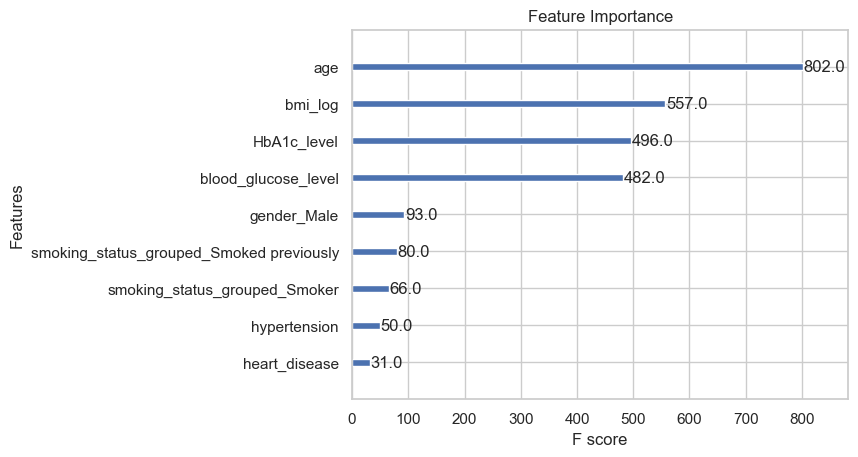

In [167]:
xgb.plot_importance(xgb_model)

plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('F score')
plt.show()

In [169]:
from datetime import datetime
from sklearn.model_selection import GridSearchCV

start = datetime.now()
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_xgb.fit(X_train_scaled, y_train_smote)

# Best parameters and best score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Score for XGBoost:", grid_search_xgb.best_score_)
print(datetime.now()-start)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Best Score for XGBoost: 0.9644819534852578
0:14:53.227765


              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17527
           1       0.70      0.75      0.72      1699

    accuracy                           0.95     19226
   macro avg       0.84      0.86      0.85     19226
weighted avg       0.95      0.95      0.95     19226



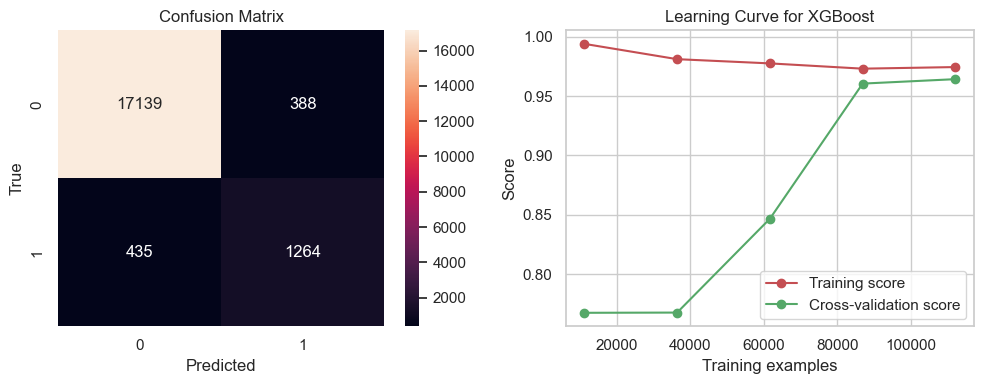

In [173]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', colsample_bytree= 0.9, learning_rate = 0.2, max_depth = 5, n_estimators = 300, subsample = 1.0)

# Train the model
xgb_model.fit(X_train_scaled, y_train_smote)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation Metrics
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.heatmap(cm_xgb, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Learning Curve
train_sizes_xgb, train_scores_xgb, test_scores_xgb = learning_curve(xgb_model, X_train_scaled, y_train_smote, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
train_scores_mean_xgb = np.mean(train_scores_xgb, axis=1)
test_scores_mean_xgb = np.mean(test_scores_xgb, axis=1)

plt.subplot(122)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for XGBoost")
plt.plot(train_sizes_xgb, train_scores_mean_xgb, 'o-', color="r", label="Training score")
plt.plot(train_sizes_xgb, test_scores_mean_xgb, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

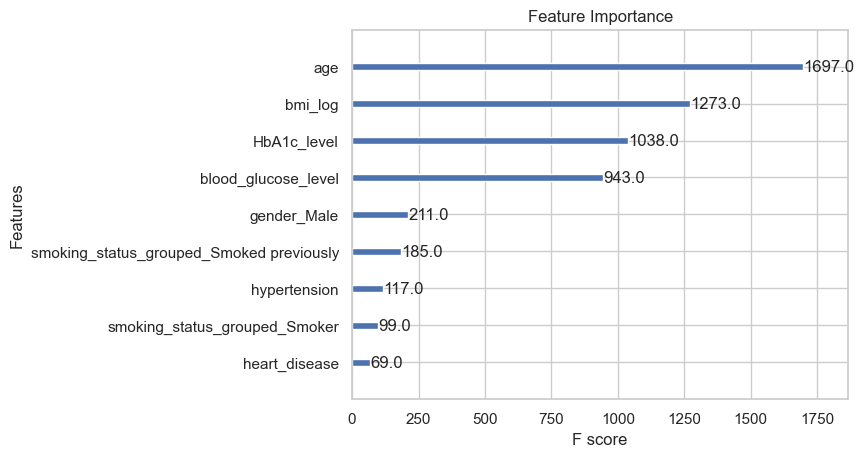

In [174]:
xgb.plot_importance(xgb_model)

plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('F score')
plt.show()

In [172]:
metrics = {}

# Logistic Regression Metrics
metrics['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_logistic),
    'Precision': precision_score(y_test, y_pred_logistic),
    'Recall': recall_score(y_test, y_pred_logistic),
    'F1 Score': f1_score(y_test, y_pred_logistic)
}

# KNN Metrics
metrics['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1 Score': f1_score(y_test, y_pred_knn)
}

# Decision Tree Metrics
metrics['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1 Score': f1_score(y_test, y_pred_dt)
}

# Random Forest Metrics
metrics['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}

# XGBoost Metrics
metrics['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb)
}

# Convert the metrics dictionary into a dataframe for easy viewing
metrics_df = pd.DataFrame(metrics).T  # Transpose to have models as rows and metrics as columns
metrics_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.881567,0.417758,0.864038,0.563207
KNN,0.897327,0.456028,0.839317,0.590966
Decision Tree,0.940653,0.640342,0.749264,0.690534
Random Forest,0.948975,0.697036,0.747499,0.721386
XGBoost,0.957193,0.765133,0.743967,0.754402


In [176]:
model_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN'],
    'Training Accuracy': [],
    'Testing Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# A function to calculate metrics and add them to the dictionary
def add_metrics(model, y_train, y_train_pred, y_test, y_test_pred):
    model_metrics['Training Accuracy'].append(accuracy_score(y_train, y_train_pred))
    model_metrics['Testing Accuracy'].append(accuracy_score(y_test, y_test_pred))
    model_metrics['Precision'].append(precision_score(y_test, y_test_pred))
    model_metrics['Recall'].append(recall_score(y_test, y_test_pred))
    model_metrics['F1 Score'].append(f1_score(y_test, y_test_pred))

# Add metrics for each model
add_metrics('Logistic Regression', y_train_smote, logistic_model.predict(X_train_scaled), y_test, y_pred_logistic)
add_metrics('Decision Tree', y_train_smote, decision_tree_model.predict(X_train_scaled), y_test, y_pred_dt)
add_metrics('Random Forest', y_train_smote, random_forest_model.predict(X_train_scaled), y_test, y_pred_rf)
add_metrics('XGBoost', y_train_smote, xgb_model.predict(X_train_scaled), y_test, y_pred_xgb)
add_metrics('KNN', y_train_smote, knn_model.predict(X_train_scaled), y_test, y_pred_knn)

# Convert the dictionary into a pandas dataframe for a nicer display
metrics_df = pd.DataFrame(model_metrics)

# Display the dataframe
metrics_df

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.888083,0.881567,0.417758,0.864038,0.563207
1,Decision Tree,0.999223,0.940653,0.640342,0.749264,0.690534
2,Random Forest,0.999223,0.948975,0.697036,0.747499,0.721386
3,XGBoost,0.973980,0.957193,0.765133,0.743967,0.754402
4,KNN,0.951333,0.897327,0.456028,0.839317,0.590966
